In [2]:
import random
import numpy as np
import os
import glob
import cv2
#from features import *

In [3]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [4]:
def get_data():
    train_dir = "../data/train/"
    X_train = []
    y_train = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X_train.append(img)
            y_train.append(j)
    return X_train, y_train

In [5]:
X_train, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [6]:
X_train = np.asarray(X_train)
y = np.asarray(y)
print(X_train.shape)

(22424, 64, 64, 3)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Training data shape:  (17939, 12288)
Validation data shape:  (4485, 12288)


In [9]:
from linear_classifier import Softmax

lr = 1e-7
reg = 1e4

softmax = Softmax()
softmax.train(X_train, y_train, learning_rate =lr, reg=reg, num_iters=2000, verbose=False)
y_train_pred = softmax.predict(X_train)
y_val_pred = softmax.predict(X_val)
train_accuracy = np.mean(y_train == y_train_pred)
val_accuracy = np.mean(y_val == y_val_pred)

print('train accuracy: %f val accuracy: %f' % (train_accuracy, val_accuracy))

train accuracy: 0.766208 val accuracy: 0.768116


In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_val_pred)

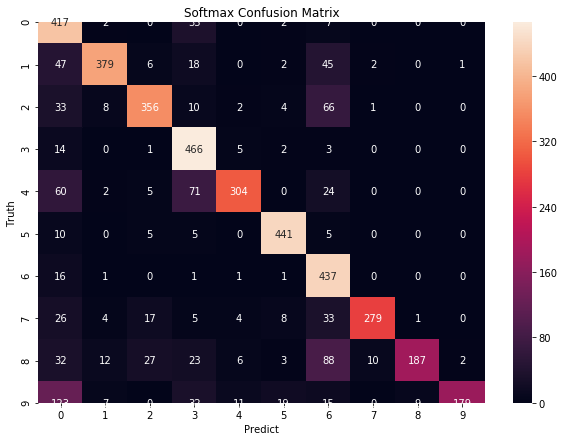

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Softmax Confusion Matrix")
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [16]:
from sklearn import metrics
print("softmax Performance Matrix")
print(metrics.classification_report(y_val, y_val_pred))

softmax Performance Matrix
              precision    recall  f1-score   support

           0       0.54      0.90      0.67       463
           1       0.91      0.76      0.83       500
           2       0.85      0.74      0.79       480
           3       0.70      0.95      0.81       491
           4       0.91      0.65      0.76       466
           5       0.91      0.95      0.93       466
           6       0.60      0.96      0.74       457
           7       0.96      0.74      0.83       377
           8       0.95      0.48      0.64       390
           9       0.98      0.45      0.62       395

    accuracy                           0.77      4485
   macro avg       0.83      0.76      0.76      4485
weighted avg       0.83      0.77      0.77      4485

